## Perceptron Learning Algorithm

------------------

A single layer neural network is termed a perceptron, while a multi-layer perceptron is called a neural network. A perceptron can be used to classify binary linear data.   

The perceptron learning algorithm was invented in the late 1950s by Frank Rosenblatt. It belongs to the class of linear classifiers, this is, for a data set classified according to binary categories (which we will assume to be labeled +1 and -1), the classifier seeks to divide the two classes by a linear separator. The separator is a (n-1)-dimensional hyperplane in a n-dimensional space, in particular it is a line in the plane and a plane in the 3-dimensional space.   

Our data set will be assumed to consist of N observations characterized by d features or attributes, $\mathbf{x}_n = (x_1, \ldots, x_d)$  for  $n = (1, \ldots, N)$. The problem of binary classifying these data points can be translated to that of finding a series of weights $W_{i}$  such that all vectors verifying $\displaystyle \sum_{i=1}^d w_i x_i < b$ are assigned to one of the classes whereas those verifying $\displaystyle \sum_{i=1}^d w_i x_i > b$ are assigned to the other, for a given threshold value b. If we rename b = $w_0$ and introduce an artificial coordinate $x_0$ = 1 in our vectors $\mathbf{x}_n$, we can write the perceptron separator formula as $\displaystyle h(\mathbf{x}) = \mathrm{sign}\left(\sum_{i=0}^d w_i x_i\right) = \mathrm{sign}\left( \mathbf{w}^{\mathbf{T}}\mathbf{x}\right)$
Note that $\mathbf{w}^{\mathbf{T}}\mathbf{x}$ is notation for the scalar product between vectors $\mathbf{w}$  and  $\mathbf{x}$. Thus the problem of classifying is that of finding the vector of weights $\mathbf{w}$ given a training data set of N vectors $\mathbf{x}$ with their corresponding labeled classification vector $(y_1, \ldots, y_N)$.
  
##### History of Neural Network
In 1943 McCulloch and Pitts developed a mathematical and algorithm-based computational model for neural networks. This model was given the name threshold logic. The model cleared the door for two separate approaches to neural network research. The first focused on biological processes in the brain, while the second focused on neural network applications in artificial intelligence.    

In 1949 Hebb introduced the first neurobiological learning rule: "Neurons that fire together, wire together".

In 1950s computer were in their infancy. The first neural network for commercial use: designed for adaptive filtering of echoes in phone lines (1959). Still in use today.

In 1958 Rosenblatt developed Perceptron, a pattern recognition algorithm based on a two-layer learning computer network that uses simple addition and subtraction.

1969 - 1981 Minsky and Papert deal "deathblow" to Perceptrons by showing they cannot learn XOR. Later, others showed this wasn't true for deep NNs. "NN Winter": excessive hype and outrageous claims lead to dying interest/funding.

#### A perceptron has four parts: Inputs, weights and bias, net sum, and activation function.  
1. All inputs $X_{i}$ and a constant 1 for bias are multiplied by their weights $W_{i}$
2. Sum all the multiplied values
3. Plug the weighted sum to the activation function, and it will generate an output. If the output is greater than a certain threshold, then it will classify the point to a certain class, and if not then it will be classified to the other class.



The perceptron drawn as a neuron

<img src="https://miro.medium.com/max/700/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="500"/>  

The input data will be paired with the corresponding weights and sum together, and the put into an activation function to create the output.

$
\hat y^i = \text{sign}(w^T\bar x^i)
$
 


There are different kinds of activation functions such as step function, sign function, and Relu, etc., and you can try different one base on your need and see which one fits the model.

For example: Step Function.  
![image for step function](https://miro.medium.com/max/480/1*0iOzeMS3s-3LTU9hYH9ryg.png)

---------------------

### In Class Example
---------------------

In class we implement the *perceptron learning algorithm* for binary species
classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Our task is to classify setosa and versicolor species using two feature measures, such as sepal length and sepal width. In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [numpy](https://numpy.org/)

Import libraries and dataset from sklearn

In [1]:
# import the necassary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import dataset from sklearn which contain the iris data
from sklearn import datasets

#load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [2]:
# iris['target'].unique()
#view whole data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(iris)
# iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4               

#### Dataset information

* "The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other." - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)
* Variables in the data: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), class with Setosa, Versicolour and Virginica.

##### Our goal is to build a model to predict if the iris is Setosa or Virginica by using sepal length and sepal width.

In the following code cell we extract out data to numpy arrays.
We change the target name from 0 and 1 to  1 and -1 correspondingly to the correct species, and try to predict.

---

Extract sepal length (cm) and sepal width as our X matrix and target as y vector. Change labels to match our desired 1 or -1 labels

In [3]:
label_dict = {iris['target_names'][0] : 1.0, iris['target_names'][1] : -1.0}

#Extract out desired features from iris 
X = iris['data'][['sepal length (cm)','sepal width (cm)']].iloc[:100]

#Convert features to numpy array 
X = X.to_numpy()


#Extract out labels 
y = iris['target'].iloc[:100]

# Convert lables to numpy array
y = y.to_numpy()

# Change labels to match our desired 1 or -1 labels

for i, label in enumerate(y):
    if label == 0.0:
        y[i] = 1.0
    elif label == 1.0:
        y[i] = -1.0    

Add bias term (1) to the X matrix and name it X_bar.

In [4]:
X_bar = []
for x in X:
    X_bar.append(np.append(x,np.ones(1))) #add bias (1)
X_bar = np.array(X_bar)
X_bar[1:10]

array([[4.9, 3. , 1. ],
       [4.7, 3.2, 1. ],
       [4.6, 3.1, 1. ],
       [5. , 3.6, 1. ],
       [5.4, 3.9, 1. ],
       [4.6, 3.4, 1. ],
       [5. , 3.4, 1. ],
       [4.4, 2.9, 1. ],
       [4.9, 3.1, 1. ]])

#### Visualization of Data

We want to visualize the data to see the distribution of the two classes

Text(0.5, 1.0, 'Iris Data Plot')

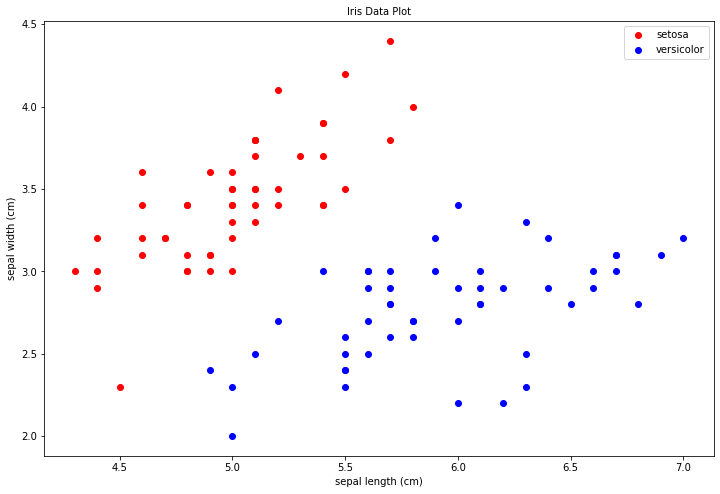

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(X_bar[:50,0],X_bar[:50,1],label = 'setosa', color = 'r')
plt.scatter(X_bar[50:,0],X_bar[50:,1],label = 'versicolor', color = 'b')


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.legend()
plt.title("Iris Data Plot",fontsize=10)

We need the activation function, so we define this function in the following code cell.
If Xy > 0, then output 1, if Xy <= 0 then output -1.  

The loss function we use here is: $L = \displaystyle\frac{1}{2}\sum_{i=1}^{n}(x_{i}\hat{w}_{i} - y_{i})^2$ 

In [6]:
#activation function (prediction)

def sign(x,y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

---
#### The Gradient Descent Application Update Rule

Everytime when the prediction is not correct, the gradient descent will help to correct the weight vector to the right direction for the next iteration. $\alpha$ is the learning rate and the appoximate gradient descent is $(\hat{y}^{i} - y{i})\bar{x}^{i}$. We say it is appoximate gradient descent is because we can not take the derivative to a step function, so we can only approximate it.

$
w\rightarrow w - \alpha(\hat{y}^{i} - y{i})\bar{x}^{i}
$

_**Epoch**_ is the number of passes of the entire training dataset the model has completed.

Gradient descent method or batch steepest descent method uses the entire training data per epoch, while the stochastic gradient descent method uses only one training example per epoch, and the mini-batch gradient descent method lies in between of these two extremes.

---

Write a gradient descent function and setup epochs and learning rate. We also randomly sample our weights from uniform distribution.

In [7]:
def grad_approx(w,x,y):
    return(sign(w,x) - y)*x

#  set epochs
epochs = 1000

#set alpha learning rate
alpha = 0.5


#random initial weights
w = np.random.rand(3)  #3 random weight for x1, x2, bias

See the initial loss before learning

In [8]:
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

The Loss before implementing stochastic approx gradient descent = 100.0


Record loss at each epochs

In [9]:
losses = []

for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(100)
        w = w - alpha*grad_approx(w, X_bar[random_index],y[random_index])
    losses.append(L(w))

Visualize the loss at each epoch. We see that the losses converge to 0 around 700 to 800 ecpochs.

Text(0, 0.5, 'Loss')

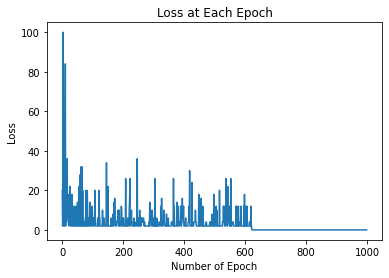

In [10]:
plt.plot(losses)
plt.title('Loss at Each Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')

See how does the training perform on the dataset

Text(0.5, 1.0, 'Iris Data Plot')

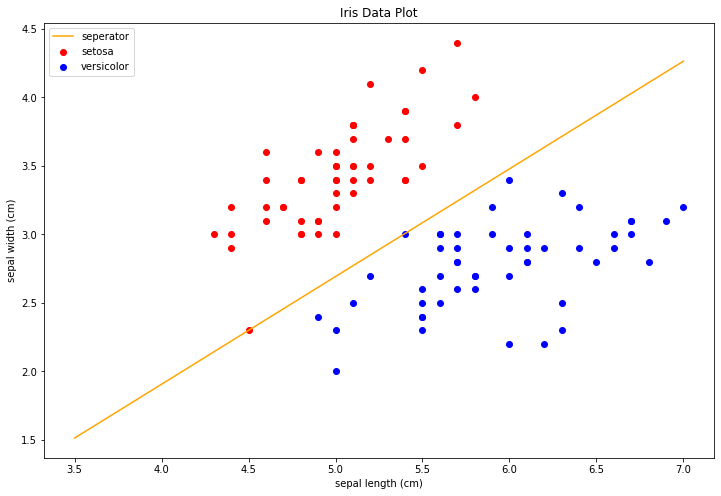

In [11]:
domain = np.arange(3.5,7.5,.5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]


plt.figure(figsize = (12,8))
plt.scatter(X_bar[:50,0],X_bar[:50,1],label = 'setosa', color = 'r')
plt.scatter(X_bar[50:,0],X_bar[50:,1],label = 'versicolor', color = 'b')

plt.plot(domain,
        line,
        label = 'seperator',
        color = 'orange')


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.legend()
plt.title("Iris Data Plot")

-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
Same as KNN practice, here we will use [penguins dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris) since the two penguin species in this dataset are linearly separable, and we just mentioned that a preceptron is used for seperating linearly binary classes.  

The dataset contains 342 observations and seven variables.  
The seven columns are:
* species (three penguin species: Chinstrap, Adélie, or Gentoo)
* island
* bill_length_mm
* bill_depth_mm
* flipper_length_mm
* body_mass_g
* sex

###### Our goal is to classify two species Adélie and Gentoo by their  lipper_length_mm and bill_length_mm.


The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/doc/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [seaborn](https://seaborn.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/)

In [12]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

Load penguin dataset

In [13]:
df = pd.read_csv('penguins.csv')

See what does the dataset look like. Found there are missing values.

In [14]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Drop missing values NaN

In [16]:
df = df.dropna()

The summary of the dataset

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


#### Exploratory Data Analysis

Explore the data. Found that Adélie and Gentoo can we linearly seperated by bill_depth_mm and body_mass_g.

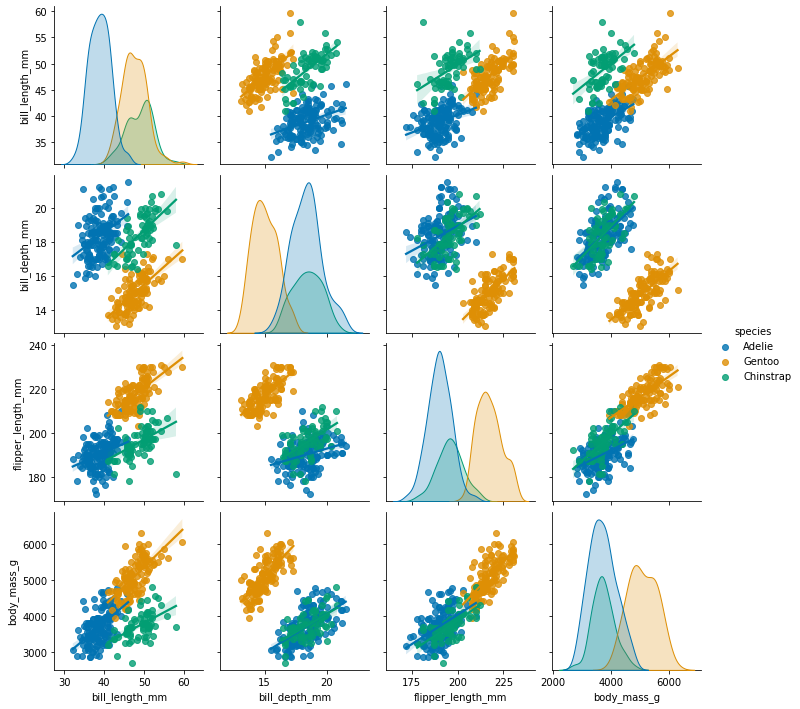

In [18]:
sns.pairplot(df, kind='reg', hue='species',palette='colorblind')

See body_mass_g vs bill_depth_mm and found Adelie and Gentoo are linearly seperable.

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

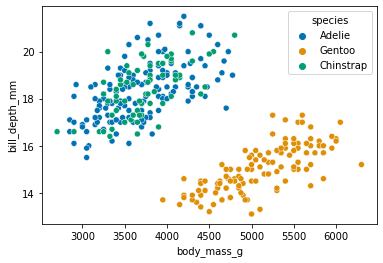

In [19]:
sns.scatterplot(data=df, x='body_mass_g', y='bill_depth_mm', hue='species', palette='colorblind')

We first use LabelEncoder from sklearn.preprocessing to make species into encoded labels.   
Labels for the species:
* 0:Adelie
* 1:Chinstrap
* 2:Gentoo

In [20]:
from sklearn.preprocessing import LabelEncoder
species_types = (df['species'].unique())
df['species_types'] = df['species']
# creating instance of labelencoder
labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
df['species_types'] = labelencoder.fit_transform(df['species_types'])

Then extract Adélie (0) and Gentoo (2) and make them into y vector. And then also extract body_mass_g and bill_depth_mm and make them in X matrix. In the following code cell we extract out data to numpy arrays. We change the species_types from 0 and 2 to 1 and -1 correspondingly to the correct species, and try to predict. We scale the X and by normalization to make sure both variables have the same scale. Each x subtract x mean and divided by the standard deviation of x.

In [21]:
y = df[(df['species_types']==2) | (df['species_types']==0)]['species_types'].to_numpy()
X = df[(df['species_types']==2) | (df['species_types']==0)][['body_mass_g','bill_depth_mm']].to_numpy()

We change the target name from 0 and 2 to  1 and -1 correspondingly to the correct species, and try to predict.

In [22]:
# Change labels to match our desired 1 or -1 labels
for i, label in enumerate(y):
    if label == 0.0:
        y[i] = 1.0
    elif label == 2.0:
        y[i] = -1.0

Next we add bias to X matrix

In [23]:
# add bias to X matrix
X_bar = []

for x in X:
    X_bar.append(np.append(x,np.ones(1)))
X_bar = np.array(X_bar)

---

#### Visualization of Data

We want to visualize the data to see the distribution of the two classes: Species: Adélie vs Gentoo by their body mass and bill depth.


---

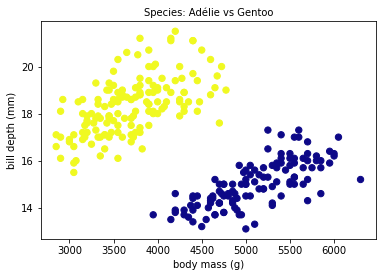

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap='plasma')

plt.xlabel('body mass (g)')
plt.ylabel('bill depth (mm)')

plt.title('Species: Adélie vs Gentoo',fontsize=10)

plt.show()

We need the activation function, so we define this function in the following code cell.
If Xy > 0, then output 1, if Xy <= 0 then output -1.  

The loss function we use here is: $L = \displaystyle\frac{1}{2}\sum_{i=1}^{n}(x_{i}\hat{w}_{i} - y_{i})^2$ 

In [25]:
#activation function (prediction)

def sign(x,y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))
    

# def L(w, features = X_bar, labels = y):
#     return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))
    

We will random sample two weights (x1 and x2) and bias from uniform distribution as our initial weights and bias 

In [26]:
def grad_approx(w,x,y):
    return(sign(w,x) - y)*x

#  set epochs
epochs = 1000

#set alpha learning rate
alpha = 0.5


#random initial weights
w = np.random.rand(3)  #3 random weight for x1, x2, bias

In [27]:
#initial weights and bias
w

array([0.57327183, 0.36193011, 0.16739681])

See the loss before implementing stochastic approx gradient descent

In [28]:
print(f"The loss before implementing stochastic approx gradient descent = {L(w)}")

The loss before implementing stochastic approx gradient descent = 238.0


We record the losses of each gradient descent update epoch.

In [29]:
losses = []

for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(len(y))
        w = w - alpha*grad_approx(w, X_bar[random_index],y[random_index])
    losses.append(L(w))

Plot the loss as the function of the number of epochs. We see that the losses converge to 0 around 200 ecpochs.

Text(0, 0.5, 'Epochs')

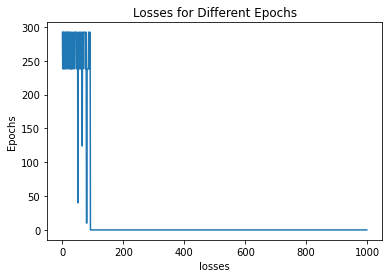

In [30]:
plt.plot(losses)
plt.title('Losses for Different Epochs')
plt.xlabel('losses')
plt.ylabel('Epochs')

See how training performs on the dataset

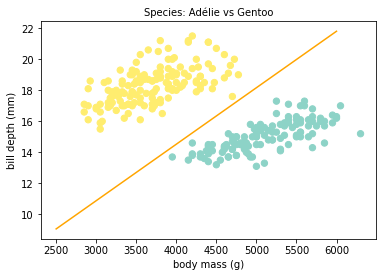

In [31]:
domain = np.arange(2500,6500,500)
line = [(w[0]*x + w[2])/-w[1] for x in domain]

plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap='Set3')  #plt.cm.Spectral

plt.xlabel('body mass (g)')
plt.ylabel('bill depth (mm)')

plt.title("Species: Adélie vs Gentoo",fontsize=10)

plt.plot(domain,line,label = 'seperator',color = 'orange')


#### Conclusion
We see that the perceptron can well seperate two classes well in iris and penguin example. When the number of epoch increase it means that we increase the numnber of training on the perceptron, and the more it trains, the smaller loss it will yield and more possible to converge the loss to 0.  

#### References
Datasciencelab, W. by, &amp; by, W. (2014, January 10). Machine learning classics: The Perceptron. The Data Science Lab. Retrieved November 10, 2021, from https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/. 
